<h1 align='center'>Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency.

You  can  convert the sample time series to be fixed daily frequency by calling resample

In [23]:
from datetime import datetime
import pandas as pd
import numpy as np

In [24]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [25]:
ts = pd.Series(np.random.randn(6), index=dates)

In [26]:
ts=pd.Series(ts)

In [27]:
ts

2011-01-02    0.752446
2011-01-05    0.642580
2011-01-07    0.416405
2011-01-08   -0.684227
2011-01-10    0.363005
2011-01-12    0.738215
dtype: float64

In [28]:
resampler = ts.resample('D')

In [29]:
ts

2011-01-02    0.752446
2011-01-05    0.642580
2011-01-07    0.416405
2011-01-08   -0.684227
2011-01-10    0.363005
2011-01-12    0.738215
dtype: float64

<b>Generating Date Ranges

In [30]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [31]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By  default,  date_range  generates  daily  timestamps.  
If  you  pass  only  a  start  or  enddate, you must pass a number of periods to generate

In [32]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The  start  and  end  dates  define  strict  boundaries  for  the  generated  date  index.  Forexample, if you wanted a date index containing the last business day of each month,you would pass the 'BM' frequency (business end of month)

In [34]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

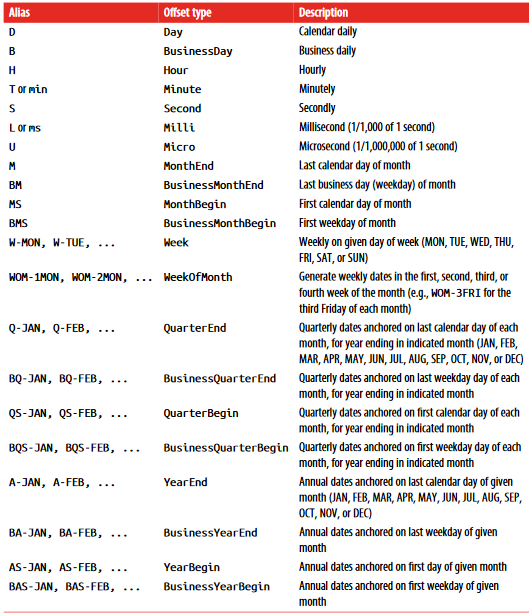

Sometimes you will have start or end dates with time information but want to gener‐ate a set of timestamps normalized to midnight as a convention. To do this, there is anormalize option:

In [35]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

<b>Frequencies and Date Offsets

Frequencies  in  pandas  are  composed  of  a  base  frequency  and  a  multiplier.  Base  fre‐quencies  are  typically  referred  to  by  a  string  alias,  like  'M'  for  monthly  or  'H'  forhourly.  For  each  base  frequency,  there  is  an  object  defined  generally  referred  to  as  adate offset.

In [36]:
from pandas.tseries.offsets import Hour, Minutes

In [37]:
hour = Hour()

In [38]:
four_hours = Hour(4)

In [39]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [41]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly,  you  can  pass  frequency  strings,  like  '1h30min',  that  will  effectively  beparsed to the same expression

In [42]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, 'M'(calendar  month  end)  and  'BM'  (last  business/weekday  of  month)  depend  on  thenumber  of  days  in  a  month  and,  in  the  latter  case,  whether  the  month  ends  on  aweekend or not. We refer to these as anchored offsets.

<b>Week of month dates

One useful frequency class is “week of month,” starting with WOM. This enables you toget dates like the third Friday of each month:

In [43]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [44]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

<b>Shifting (Leading and Lagging) Data

“Shifting” refers to moving data backward and forward through time. Both Series andDataFrame have a shift method for doing naive shifts forward or backward, leavingthe index unmodified

In [45]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [46]:
ts

2000-01-31    0.360945
2000-02-29   -0.446990
2000-03-31    0.714496
2000-04-30   -1.446238
Freq: M, dtype: float64

In [47]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.360945
2000-04-30   -0.446990
Freq: M, dtype: float64

In [48]:
ts.shift(-2)

2000-01-31    0.714496
2000-02-29   -1.446238
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A  common  use  of  shift  is  computing  percent  changes  in  a  time  series  or  multipletime series as DataFrame columns. 

In [49]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -2.238389
2000-03-31   -2.598462
2000-04-30   -3.024136
Freq: M, dtype: float64

Because  naive  shifts  leave  the  index  unmodified,  some  data  is  discarded.  Thus  if  thefrequency  is  known,  it  can  be  passed  to  shift  to  advance  the  timestamps  instead  of simply the data

In [51]:
ts

2000-01-31    0.360945
2000-02-29   -0.446990
2000-03-31    0.714496
2000-04-30   -1.446238
Freq: M, dtype: float64

In [50]:
ts.shift(2, freq='M')

2000-03-31    0.360945
2000-04-30   -0.446990
2000-05-31    0.714496
2000-06-30   -1.446238
Freq: M, dtype: float64

In [52]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.360945
2000-02-29 01:30:00   -0.446990
2000-03-31 01:30:00    0.714496
2000-04-30 01:30:00   -1.446238
Freq: M, dtype: float64

<b>Shifting dates with offsets

In [53]:
from pandas.tseries.offsets import Day, MonthEnd

In [56]:
now = datetime(2011, 11, 17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [57]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an anchored offset like MonthEnd, the first increment will “roll forward” a date to the next date according to the frequency rule

In [58]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [59]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward by simply using theirrollforward and rollback methods, respectively

In [60]:
offset = MonthEnd()

In [61]:
 offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [62]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [63]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [64]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.048500
2000-02-29   -0.092890
2000-03-31   -0.067825
dtype: float64

OR

In [65]:
ts.resample('M').mean()

2000-01-31   -0.048500
2000-02-29   -0.092890
2000-03-31   -0.067825
Freq: M, dtype: float64